<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/AprendizadoSupervisionado_MPL_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Exemplo: Classificador MLP para dados iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


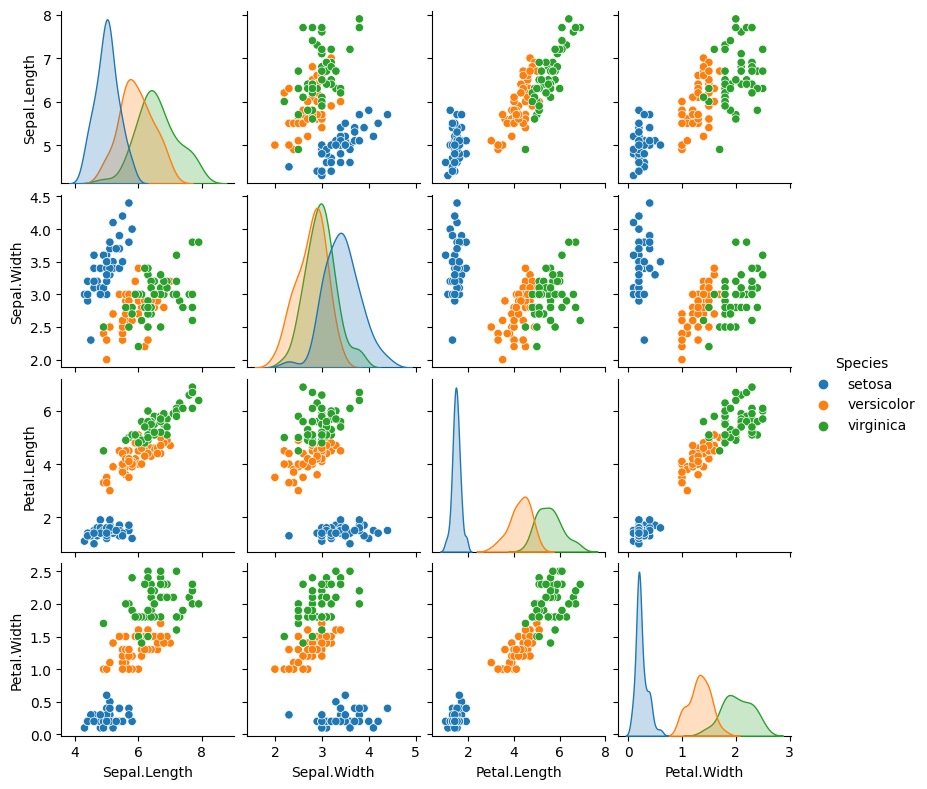

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado_de_Maquina/main/Dados/iris.csv')
sns.pairplot(df,hue='Species', height=2);

In [3]:
# Codificando uma variável categórica para numérica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Species'])

X = df[['Sepal.Length', 'Sepal.Width']]


# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar as características para ter média zero e variância unitária
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Criar um classificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(15, 5, 3), activation='tanh', random_state=42)#, max_iter=2000, verbose=True)

# Ajustar o modelo MLP aos dados de treinamento
mlp.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = mlp.predict(X_test)

# Calcular a precisão do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)


Acurácia: 0.8666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


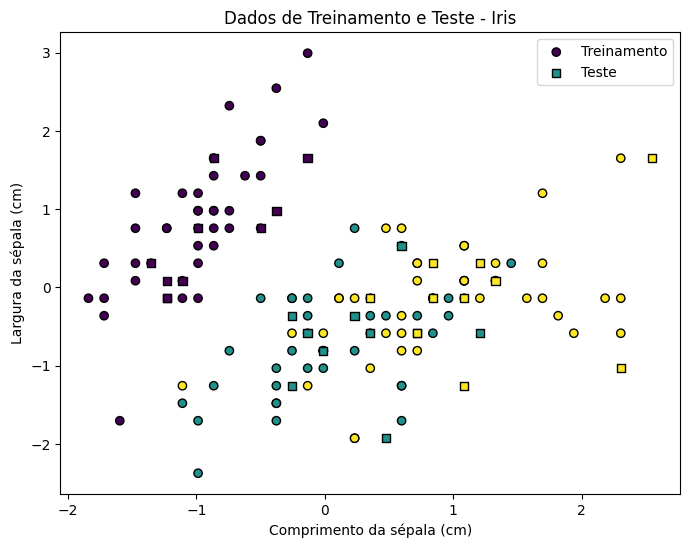

In [5]:
# Plotar os dados de treinamento e teste
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Treinamento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='s', edgecolors='k', label='Teste')
plt.xlabel('Comprimento da sépala (cm)')
plt.ylabel('Largura da sépala (cm)')
plt.legend()
plt.title('Dados de Treinamento e Teste - Iris')
plt.show()